In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import multivariate_normal

## Single Univariate Gaussian Distribution

Given a $\mu$ and a $\sigma$, we can simulate the distribution by drawing $N$ samples out of a normal distribution with those parameters.

Let the probability density of the normal distribution given $\mu$ and $\sigma$ be $f(x) = \mathcal{N}(\mu, \sigma^2)$.

In [2]:
mu = 5
sigma = 2

In [3]:
# Simulated
N = 1000
sim_single = np.random.normal(mu, sigma, N)

In [4]:
# Analytical
x_single = np.linspace(-5, 12, 100)
pdf_single = norm.pdf(x_single, loc=mu, scale=sigma)

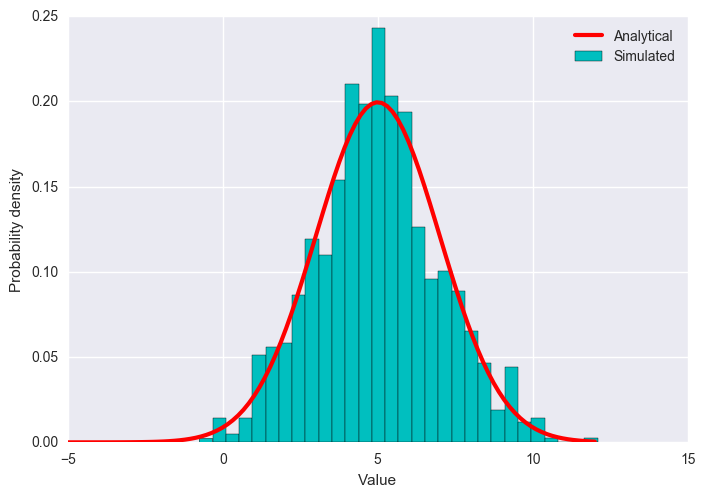

In [5]:
plt.hist(sim_single, bins=30, normed=True, color='c', label="Simulated")
plt.plot(x_single, pdf_single, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.show()

## Mixture of Univariate Gaussian Distributions

Given $K$ different populations that are normally distributed, each with its own $\mu$ and $\sigma$, we can simulate the mixture distribution by drawing $N$ samples from each normal distribution, and pooling together all $KN$ samples.

The probability density of the mixture distribution can be expressed as the weight sum of the individual densities:

$$g(x) = \frac{1}{K} \sum_{i = 1}^K f_i(x) =  \frac{1}{K} \sum_{i = 1}^K \mathcal{N}(\mu_i, \sigma_i^2)$$

In [6]:
mus = [2, 12, 20]
sigmas = [3, 1, 2]
K = len(mus)

In [7]:
# Simulated
N = 1000
sim_mix = []
for mu, sigma in zip(mus, sigmas):
    sim_mix = np.append(sim_mix, np.random.normal(mu, sigma, N), axis=0)

In [8]:
# Analytical
x_mix = np.linspace(-5, 30, 100)
pdf_mix = np.zeros(100)
for mu, sigma in zip(mus, sigmas):
    pdf_mix = pdf_mix + norm.pdf(x_mix, loc=mu, scale=sigma)
pdf_mix = pdf_mix / K

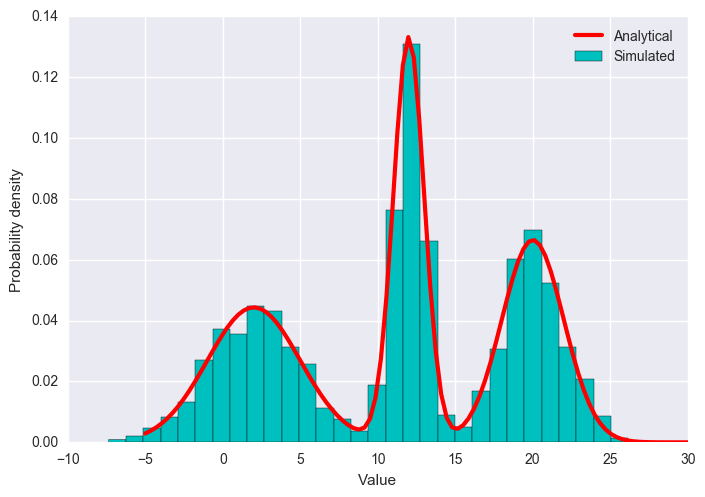

In [9]:
plt.hist(sim_mix, bins=30, normed=True, color='c', label="Simulated")
plt.plot(x_mix, pdf_mix, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.show()

## Single Multivariate Gaussian Distribution

Given a mean vector $\vec{\mu} = [\mu^{(1)}, \mu^{(2)}, ..., \mu^{(n)}]$ and an $n \times n$ covariance matrix $\Sigma$, we can simulate the distribution by drawing $N$ samples out of a multivariate normal distribution with those parameters.

Let the probability density of the multivariate normal distribution given $\vec{\mu}$ and $\Sigma$ be $f(\vec{x}) = \mathcal{N}(\vec{\mu}, \Sigma)$, where $\vec{x} = [x_1, x_2, ..., x_n]$.

In [10]:
mu_x = 1
mu_y = 2

sigma_x = 2
sigma_y = 1
cov_xy = 1

mu = [mu_x, mu_y]
sigma = [[sigma_x**2, cov_xy], [cov_xy, sigma_y**2]]

In [11]:
# Simulated
N = 5000
x, y = np.random.multivariate_normal(mu, sigma, N).T

In [12]:
# Analytical
var = multivariate_normal(mean=mu, cov=sigma)

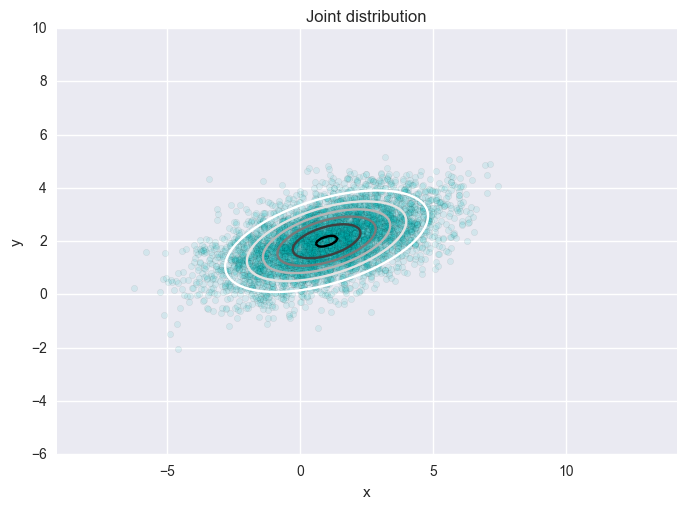

In [13]:
x_grid, y_grid = np.mgrid[-8:10:.1, -4:8:.1]
grid = np.dstack((x_grid, y_grid))

plt.scatter(x, y, alpha = 0.1, c='c', label = "Simulated")
plt.contour(x_grid, y_grid, var.pdf(grid), label = "Analytical")

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Joint distribution")
plt.show()

### Marginal distribution from a single multivariate Gaussian

Given a multivariate normal distribution $f(\vec{x}) = \mathcal{N}(\vec{\mu}, \Sigma)$, the marginal distribution over a single variable $x_j$ is given by $f^{(j)}(x_j) = \mathcal{N}\left(\mu^{(j)}, (\sigma^{(j)})^2\right)$.

In [14]:
# Marginal for x
x_single = np.linspace(-8, 10, 100)
marginal_x = norm.pdf(x_single, loc=mu_x, scale=sigma_x)

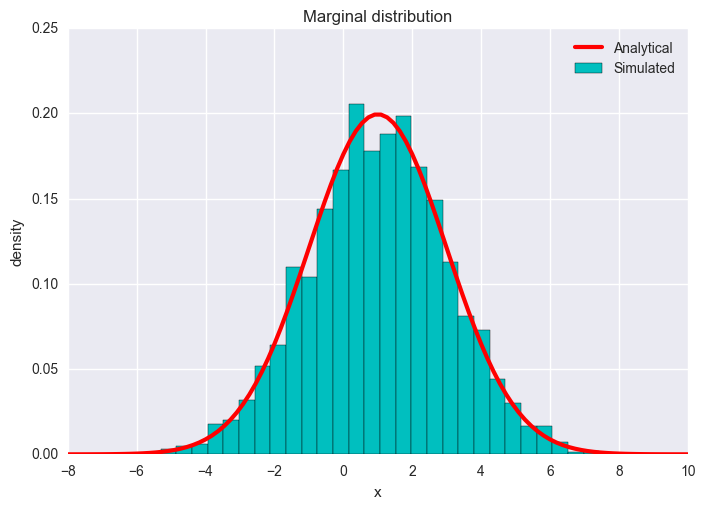

In [15]:
plt.hist(x, bins=30, normed=True, color='c', label='Simulated')
plt.plot(x_single, marginal_x, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.title("Marginal distribution")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

### Mixture of Multivariate Gaussian Distributions

Given $K$ different populations that are normally distributed, each with its own $\vec{\mu}$ and $\Sigma$, we can simulate the mixture distribution by drawing $N$ samples from each multivariate normal distribution, and pooling together all $KN$ samples.

The probability density of the mixture distribution can be expressed as the weight sum of the individual densities:

$$g(\vec{x}) = \frac{1}{K} \sum_{i = 1}^K f_i(\vec{x}) =  \frac{1}{K} \sum_{i = 1}^K \mathcal{N}(\vec{\mu}_i, \Sigma_i)$$

In [16]:
mus_x = [1, 10]
mus_y = [2, 5]

sigmas_x = [2, 2.5]
sigmas_y = [1, 2]
covs_xy = [1, 2]

K = len(mus_x)

In [17]:
# Simulated
N = 5000
x_mix = []
y_mix = []
for mu_x, sigma_x, mu_y, sigma_y, cov_xy in zip(mus_x, sigmas_x, mus_y, sigmas_y, covs_xy):
    mu = [mu_x, mu_y]
    sigma = [[sigma_x**2, cov_xy], [cov_xy, sigma_y**2]]
    x, y = np.random.multivariate_normal(mu, sigma, N).T
    x_mix = np.append(x_mix, x, axis=0)
    y_mix = np.append(y_mix, y, axis=0)

In [18]:
# Analytical
x_grid, y_grid = np.mgrid[-5:20:.1, -5:15:.1]
grid = np.dstack((x_grid, y_grid))
pdf_mix = np.zeros(grid.shape[:2])
for mu_x, sigma_x, mu_y, sigma_y, cov_xy in zip(mus_x, sigmas_x, mus_y, sigmas_y, covs_xy):
    mu = [mu_x, mu_y]
    sigma = [[sigma_x**2, cov_xy], [cov_xy, sigma_y**2]]
    var = multivariate_normal(mean=mu, cov=sigma)
    pdf_mix = pdf_mix + var.pdf(grid)
pdf_mix = pdf_mix / K

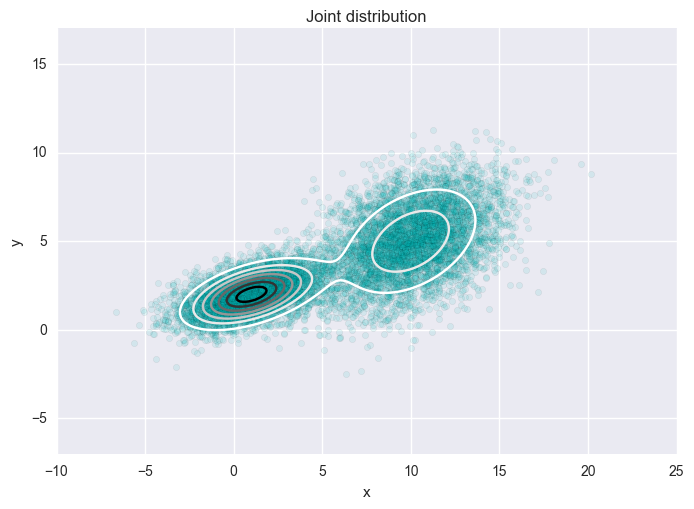

In [19]:
plt.scatter(x_mix, y_mix, alpha = 0.1, c='c', label = "Simulated")
plt.contour(x_grid, y_grid, pdf_mix, label = "Analytical")
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Joint distribution")
plt.show()

### Marginal distribution from a mixture of multivariate Gaussians

Given a mixture of $K$ multivariate normal distributions, each with mean vector $\vec{\mu_i}$ and covariance matrix $\Sigma_i$, the marginal distribution over a single variable $x_j$ can be expressed as the weighted sum of the individual marginal (univariate) distributions:

$$g^{(j)}(x_j) = \frac{1}{K} \sum_{i = 1}^K f_i^{(j)}(x_j) =  \frac{1}{K} \sum_{i = 1}^K \mathcal{N}\left(\mu_i^{(j)}, (\sigma_i^{(j)})^2\right)$$

In [20]:
# Marginal for x
x_loc_mix = np.linspace(-10, 25, 100)
marginal_x_mix = np.zeros(100)
for mu_x, sigma_x in zip(mus_x, sigmas_x):
    marginal_x_mix = marginal_x_mix + norm.pdf(x_loc_mix, loc=mu_x, scale=sigma_x)
marginal_x_mix = marginal_x_mix / K

In [21]:
# Marginal for y
y_loc_mix = np.linspace(-5, 15, 100)
marginal_y_mix = np.zeros(100)
for mu_y, sigma_y in zip(mus_y, sigmas_y):
    marginal_y_mix = marginal_y_mix + norm.pdf(y_loc_mix, loc=mu_y, scale=sigma_y)
marginal_y_mix = marginal_y_mix / K

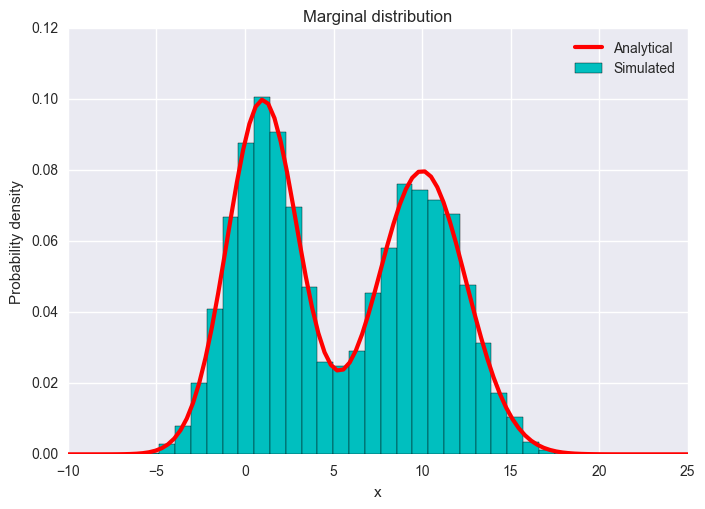

In [22]:
plt.hist(x_mix, bins=30, normed=True, color='c', label="Simulated")
plt.plot(x_loc_mix, marginal_x_mix, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("x")
plt.ylabel("Probability density")
plt.title("Marginal distribution")
plt.show()

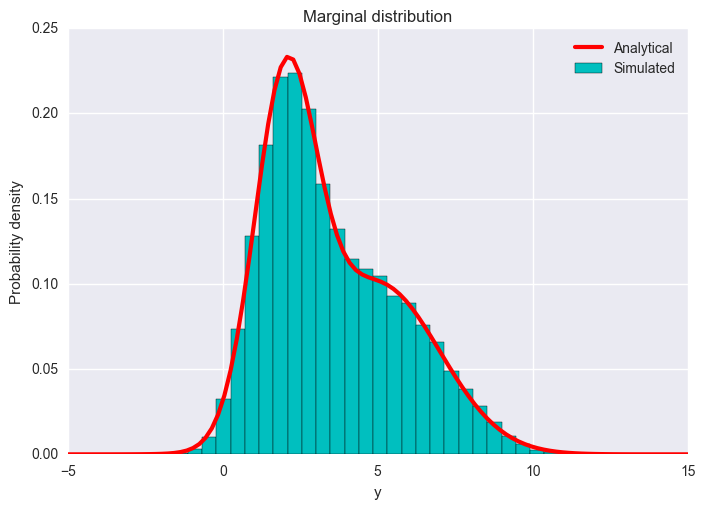

In [23]:
plt.hist(y_mix, bins=30, normed=True, color='c', label="Simulated")
plt.plot(y_loc_mix, marginal_y_mix, linewidth=3, color='r', label="Analytical")
plt.legend()
plt.xlabel("y")
plt.ylabel("Probability density")
plt.title("Marginal distribution")
plt.show()